In [1]:
import pandas as pd
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [2]:
all_data = pd.read_csv('../10_cleaned_data/processed_text.csv')
all_text = all_data['clean_text']

In [3]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(all_text)
sequences = tokenizer.texts_to_sequences(all_text)
reviews = pad_sequences(sequences, maxlen=max_len)
print(reviews)

2022-12-18 02:41:09.410169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-18 02:41:11.956861: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-18 02:41:11.956887: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-18 02:41:17.280610: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

[[   0    0    0 ...  153   52  434]
 [   0    0    0 ...    1 2046   57]
 [   0    0    0 ...   78   51  193]
 ...
 [   0    0    0 ...   16   10   32]
 [   0    0    0 ...  173   14   87]
 [   0    0    0 ...    0   56   41]]


In [4]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [24]:
data = pd.read_csv('../10_cleaned_data/processed_text.csv')
from sklearn.model_selection import train_test_split
X = data['clean_text']
Y = data['label']
X_train, X_test, Y_train, Y_test = train_test_split(reviews, Y, test_size = 0.2, random_state = 42)

In [25]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from spacy.lang.en.stop_words import STOP_WORDS
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=(None, 1))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
adam = Adam(learning_rate=0.01)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer=adam, 
    metrics=['accuracy']
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 64)           1607424   
                                                                 
 bidirectional_6 (Bidirectio  (None, 200, 128)         66048     
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 200, 128)          0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [27]:
history = model.fit(X_train, Y_train.values, epochs=10, verbose=1, batch_size=64)

Epoch 1/10
355/355 [==============================] - 46s 129ms/step - loss: 0.3458 - accuracy: 0.8662
Epoch 2/10
355/355 [==============================] - 46s 130ms/step - loss: 0.2467 - accuracy: 0.9087
Epoch 3/10
355/355 [==============================] - 46s 130ms/step - loss: 0.2062 - accuracy: 0.9252
Epoch 4/10
355/355 [==============================] - 46s 129ms/step - loss: 0.1785 - accuracy: 0.9355
Epoch 5/10
355/355 [==============================] - 46s 128ms/step - loss: 0.1657 - accuracy: 0.9420
Epoch 6/10
355/355 [==============================] - 46s 130ms/step - loss: 0.1448 - accuracy: 0.9484
Epoch 7/10
355/355 [==============================] - 46s 129ms/step - loss: 0.1469 - accuracy: 0.9478
Epoch 8/10
355/355 [==============================] - 46s 129ms/step - loss: 0.1304 - accuracy: 0.9546
Epoch 9/10
355/355 [==============================] - 46s 129ms/step - loss: 0.1169 - accuracy: 0.9581
Epoch 10/10
355/355 [==============================] - 46s 130ms/step - l

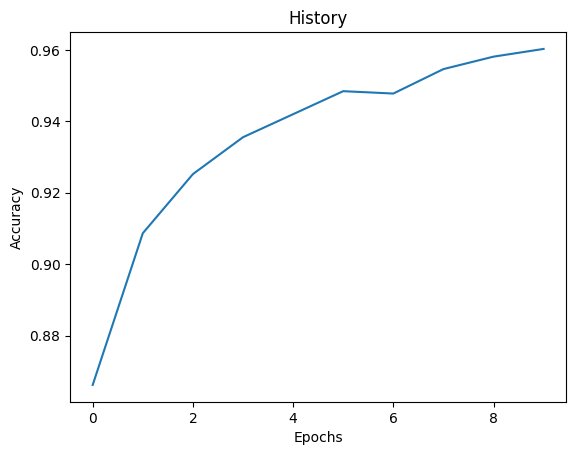

In [28]:
import matplotlib.pyplot as plt
fig = plt.plot(history.history['accuracy'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")

In [20]:
predictions = model.predict(reviews[:4])
for pred in predictions:
    print(pred[0])
print(data[:4]['sentiment'])

1/1 [==============================] - 0s 33ms/step
0.0021075285
0.011169864
0.072888255
0.0012773502
0    negative
1    negative
2    negative
3    negative
Name: sentiment, dtype: object


In [29]:
model.predict(X_test)

178/178 [==============================] - 6s 30ms/step


array([[9.7662324e-01],
       [8.6507254e-04],
       [3.0092204e-03],
       ...,
       [9.9826002e-01],
       [4.0976345e-03],
       [1.4626023e-03]], dtype=float32)

In [30]:
cvscores = []

scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)

/home/codespace/.venv/lib/python3.10/site-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


accuracy: 86.97%
